# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |  Julieta Madrigal Flores |
| **Fecha**      | Lunes 2 de febrero 2026  |
| **Expediente** | 744029  |

## Regresión polinomial

Observa la siguiente gráfica.

In [1]:
import pandas as pd

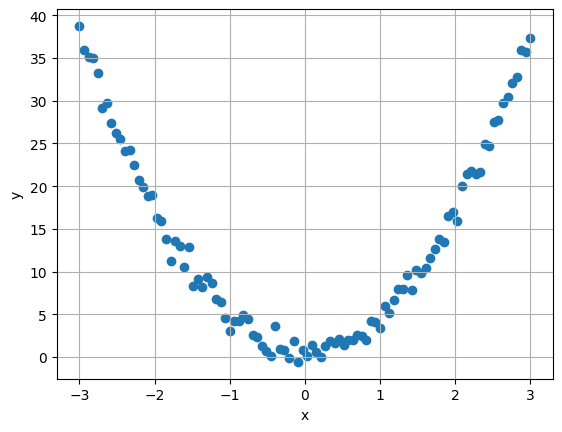

In [2]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [5]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [6]:
beta_0 = lr.intercept_
beta_0

array([13.30223226])

In [7]:
beta_1 = lr.coef_
beta_1

array([[-0.04955448]])

$$\hat{y} = {13.30} - {0.05}x $$

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

In [8]:
# R2 es la varianza que SE EXPLICA
R2 = lr.score(x, y)
R2

5.80345273922811e-05

In [9]:
y_pred = lr.predict(x)

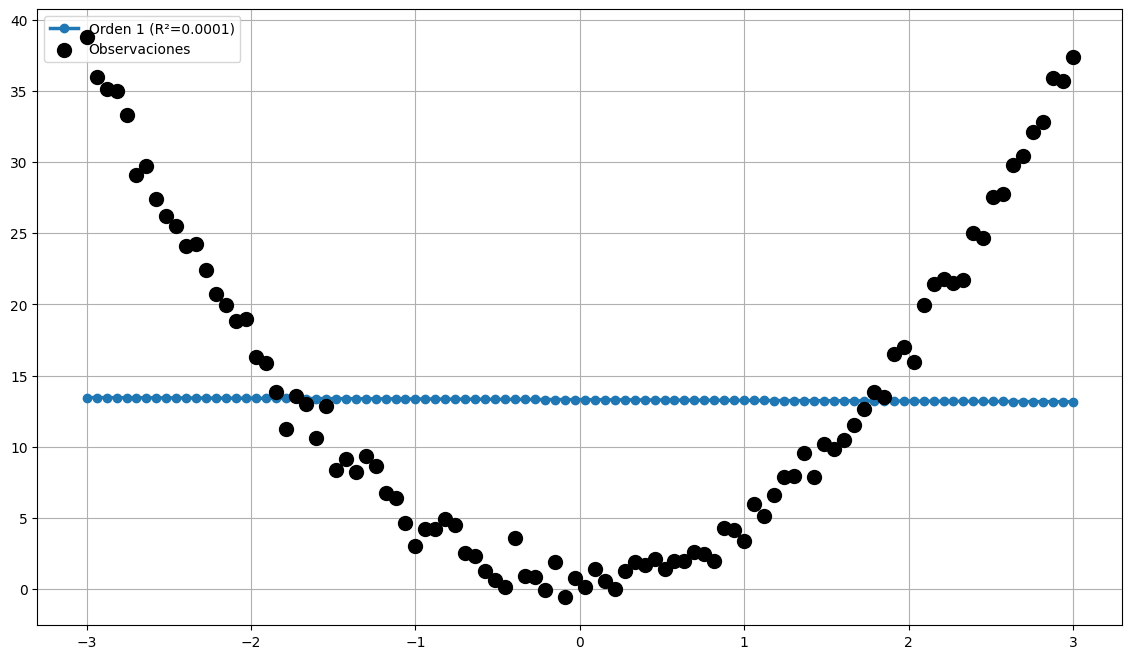

In [10]:
# Crear figura
plt.figure(figsize=(14, 8))

# PREDICCIÓN ORDEN 1
y_pred = beta_0 + beta_1 * x

# Graficar las regresiones
plt.plot(x, y_pred, 'o-', label=f'Orden 1 (R²={R2:.4f})', linewidth=2.5)

# Graficar las observaciones
# zorder=10 es para que queden encima
plt.scatter(x, y, color='black', label='Observaciones', s=100, zorder=10)

# Configuración de la gráfica
plt.legend(loc='upper left')
plt.grid()
plt.show()

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [11]:
# Hacemos x2 del orden 2
x2 = x**2

In [12]:
# Creamos la matriz
X =  np.hstack((x, x2))

In [13]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [14]:
lr.coef_

array([[-0.04955448,  4.14388884]])

In [15]:
beta_1_x2 = lr.coef_[0][0]
beta_1_x2

np.float64(-0.04955447743590568)

In [16]:
beta_1_x2 = lr.coef_[0][1]
beta_1_x2

np.float64(4.143888838887942)

- Calculamos R2 del modelo

In [17]:
# R2 es la varianza que SE EXPLICA
R2_orden2 = lr.score(X, y)
R2_orden2

0.9934118040713642

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

In [18]:
y_pred_x2 = lr.predict(X)

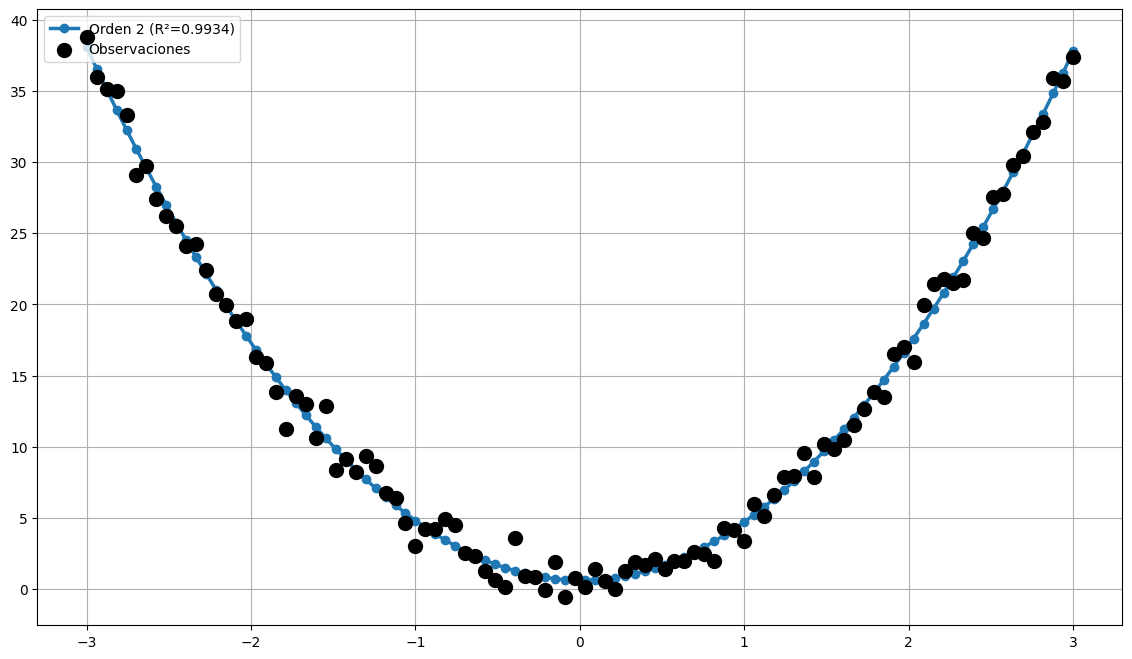

In [19]:
# Crear figura
plt.figure(figsize=(14, 8))

# Graficar las regresiones
plt.plot(x, y_pred_x2, 'o-', label=f'Orden 2 (R²={R2_orden2:.4f})', linewidth=2.5)

# Graficar las observaciones
# zorder=10 es para que queden encima
plt.scatter(x, y, color='black', label='Observaciones', s=100, zorder=10)

# Configuración de la gráfica
plt.legend(loc='upper left')
plt.grid()
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

## ***ORDEN 3***

In [57]:
x3 = x2*x

In [58]:
X3 =  np.hstack((x, x2, x3))

In [59]:
lr = LinearRegression()
lr.fit(X3, y)

LinearRegression()

In [60]:
lr.coef_

array([[-6.55753967e-02,  4.14388884e+00,  2.90847549e-03]])

In [61]:
lr.intercept_

array([0.61942096])

In [62]:
# R2 es la varianza que SE EXPLICA
R2_orden3 = lr.score(X3, y)
R2_orden3

0.9934129585186598

## ***ORDEN 5***

In [65]:
x4 = x3*x

In [66]:
x5 = x4 *x

In [67]:
X5 =  np.hstack((x, x2, x3, x4, x5))

In [68]:
lr = LinearRegression()
lr.fit(X5, y)

LinearRegression()

In [69]:
lr.coef_

array([[-2.76393644e-01,  4.12831746e+00,  1.10135698e-01,
         1.97920171e-03, -1.05167018e-02]])

In [70]:
lr.intercept_

array([0.63371165])

In [71]:
# R2 es la varianza que SE EXPLICA
R2_orden5 = lr.score(X5, y)
R2_orden5

0.9934954953676421

## ***ORDEN 7***

In [74]:
x6 = x5 *x

In [75]:
x7 = x6 *x

In [76]:
X7 = np.hstack((x, x2, x3, x4, x5, x6, x7))

In [77]:
lr = LinearRegression()
lr.fit(X7, y)

LinearRegression()

In [78]:
lr.coef_

array([[-1.75155617e-01,  4.18219958e+00,  1.07431886e-02,
        -1.56446593e-02,  1.33331414e-02,  1.40889740e-03,
        -1.61012799e-03]])

In [79]:
lr.intercept_

array([0.61018109])

In [80]:
# R2 es la varianza que SE EXPLICA
R2_orden7 = lr.score(X7, y)
R2_orden7

0.9935089341876935

## ***ORDEN 9***

In [83]:
x8 = x7 * x

In [84]:
x9 = x8 * x

In [85]:
X9 = np.hstack((x, x2, x3, x4, x5, x6, x7, x8, x9))

In [86]:
lr = LinearRegression()
lr.fit(X9, y)

LinearRegression()

In [87]:
lr.intercept_

array([0.5890186])

In [88]:
lr.coef_

array([[-1.10778098e-01,  4.26535653e+00, -9.23732104e-02,
        -6.55597796e-02,  5.72464222e-02,  1.08500851e-02,
        -8.45937252e-03, -5.51840642e-04,  3.53081565e-04]])

In [89]:
# R2 es la varianza que SE EXPLICA
R2_orden9 = lr.score(X9, y)
R2_orden9

0.9935141799662259

## ***ORDEN 11***

In [92]:
x10 = x9 * x

In [93]:
x11 = x10 * x

In [94]:
X11 = np.hstack((x, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))

In [95]:
lr = LinearRegression()
lr.fit(X11, y)

LinearRegression()

In [96]:
lr.intercept_

array([0.56708396])

In [97]:
lr.coef_

array([[ 9.00703987e-02,  4.39720527e+00, -5.68294874e-01,
        -1.90428125e-01,  3.69496567e-01,  5.17798355e-02,
        -9.13700221e-02, -5.98142327e-03,  9.92036867e-03,
         2.50411792e-04, -3.99285153e-04]])

In [98]:
# R2 es la varianza que SE EXPLICA
R2_orden11 = lr.score(X11, y)
R2_orden11

0.9935338704150221

Crea una gráfica por cada modelo con las observaciones y su curva.

## ***ORDEN 3***

In [63]:
y_orden_3 = lr.predict(X3)

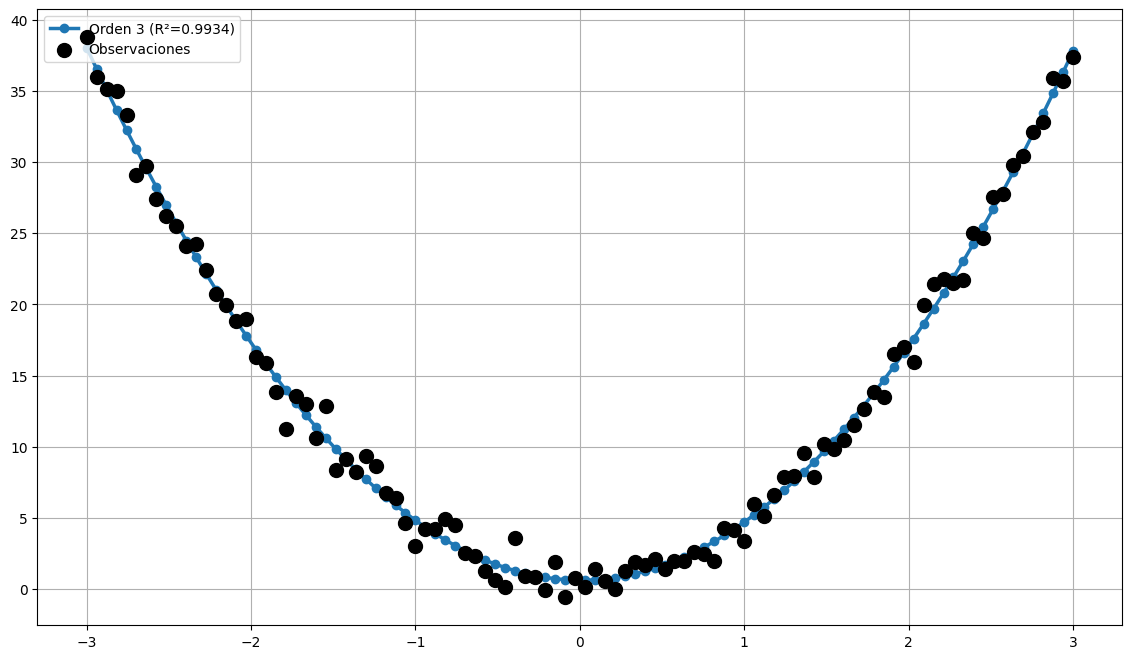

In [64]:
# Crear figura
plt.figure(figsize=(14, 8))

# Graficar las regresiones
plt.plot(x, y_orden_3, 'o-', label=f'Orden 3 (R²={R2_orden3:.4f})', linewidth=2.5)

# Graficar las observaciones
# zorder=10 es para que queden encima
plt.scatter(x, y, color='black', label='Observaciones', s=100, zorder=10)

# Configuración de la gráfica
plt.legend(loc='upper left')
plt.grid()
plt.show()

## ***ORDEN 5***

In [72]:
y_orden_5 = lr.predict(X5)

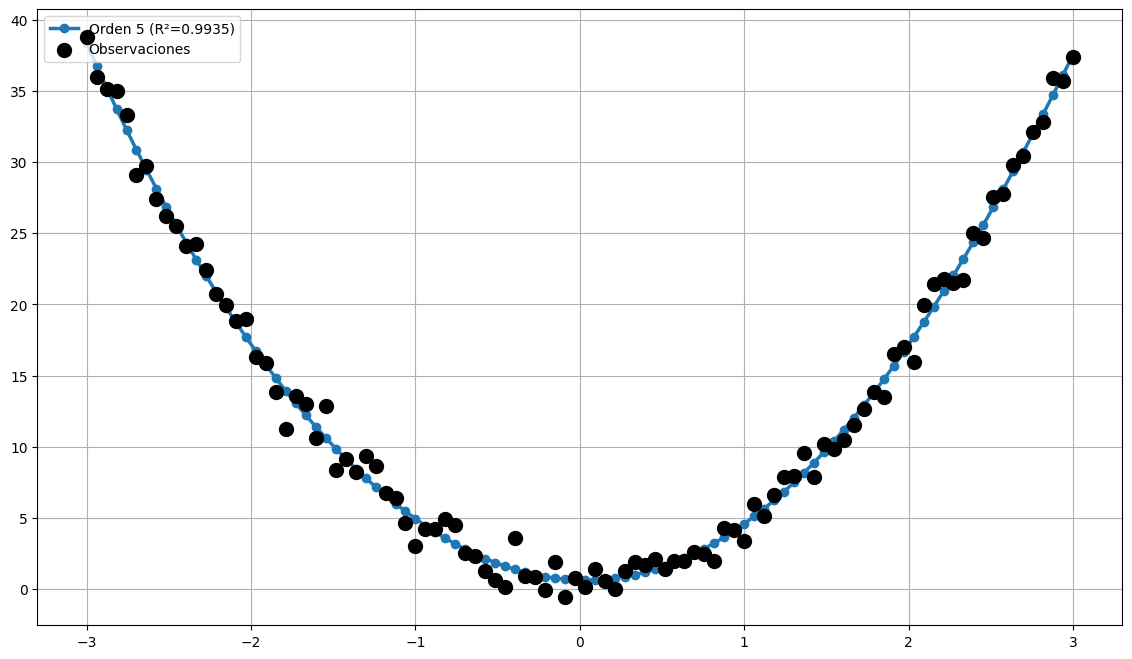

In [73]:
# Crear figura
plt.figure(figsize=(14, 8))

# Graficar las regresiones
plt.plot(x, y_orden_5, 'o-', label=f'Orden 5 (R²={R2_orden5:.4f})', linewidth=2.5)

# Graficar las observaciones
# zorder=10 es para que queden encima
plt.scatter(x, y, color='black', label='Observaciones', s=100, zorder=10)

# Configuración de la gráfica
plt.legend(loc='upper left')
plt.grid()
plt.show()

## ***ORDEN 7***

In [81]:
y_orden_7 = lr.predict(X7)

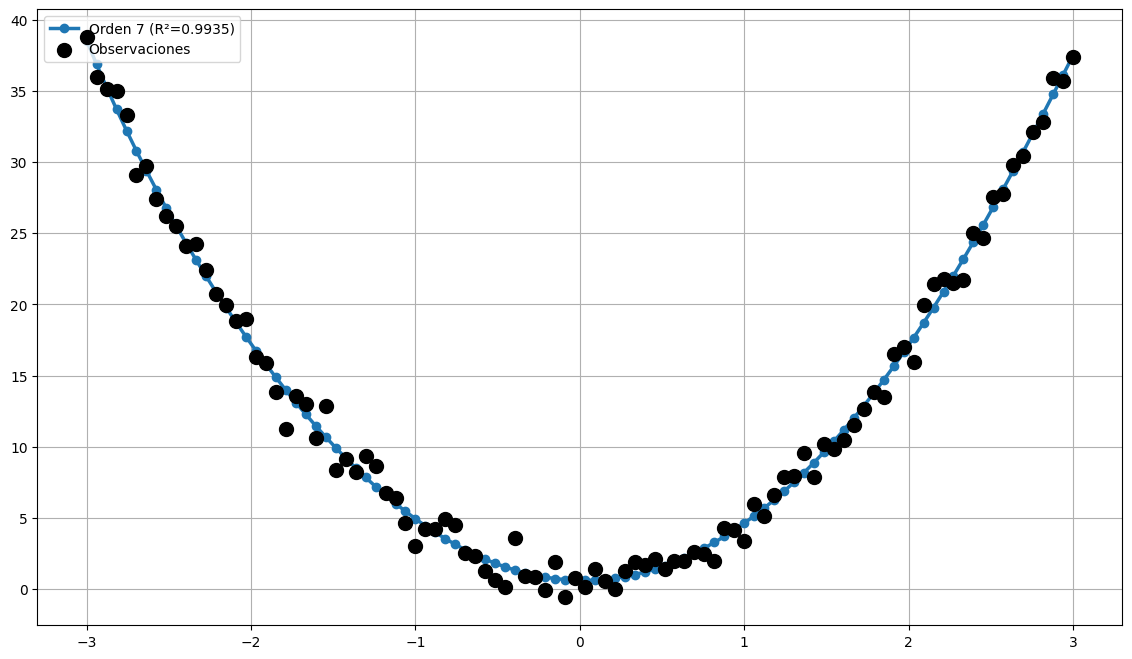

In [82]:
# Crear figura
plt.figure(figsize=(14, 8))

# Graficar las regresiones
plt.plot(x, y_orden_7, 'o-', label=f'Orden 7 (R²={R2_orden7:.4f})', linewidth=2.5)

# Graficar las observaciones
# zorder=10 es para que queden encima
plt.scatter(x, y, color='black', label='Observaciones', s=100, zorder=10)

# Configuración de la gráfica
plt.legend(loc='upper left')
plt.grid()
plt.show()

## ***ORDEN 9***

In [90]:
y_orden_9 = lr.predict(X9)

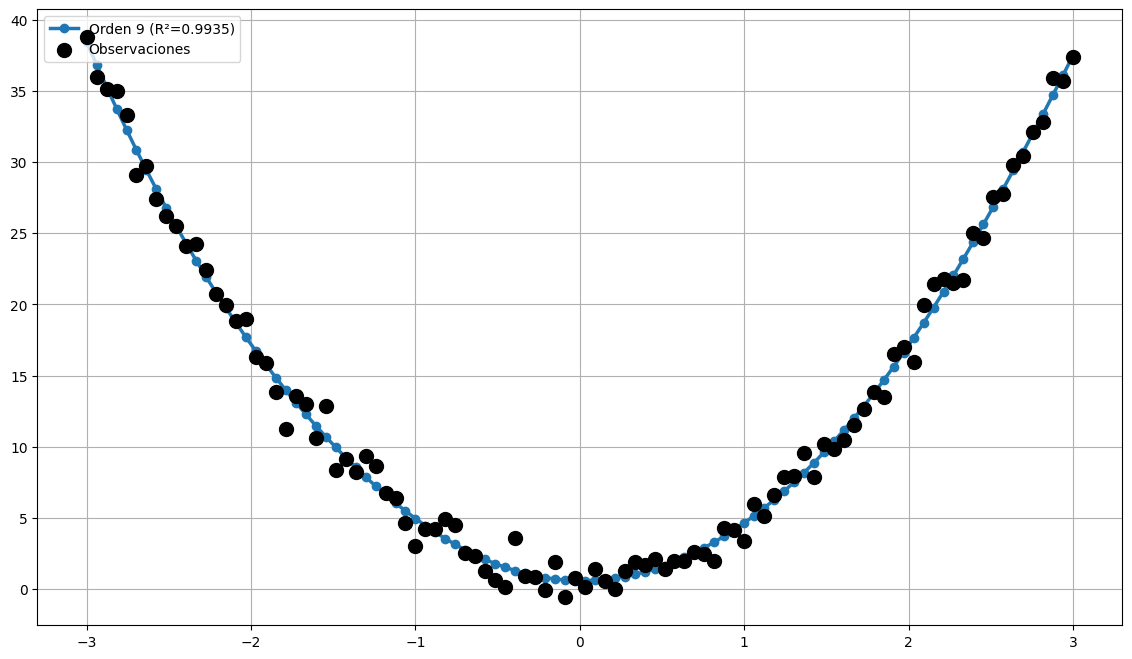

In [91]:
# Crear figura
plt.figure(figsize=(14, 8))

# Graficar las regresiones
plt.plot(x, y_orden_9, 'o-', label=f'Orden 9 (R²={R2_orden9:.4f})', linewidth=2.5)

# Graficar las observaciones
# zorder=10 es para que queden encima
plt.scatter(x, y, color='black', label='Observaciones', s=100, zorder=10)

# Configuración de la gráfica
plt.legend(loc='upper left')
plt.grid()
plt.show()

## ***ORDEN 11***

In [99]:
y_orden_11 = lr.predict(X11)

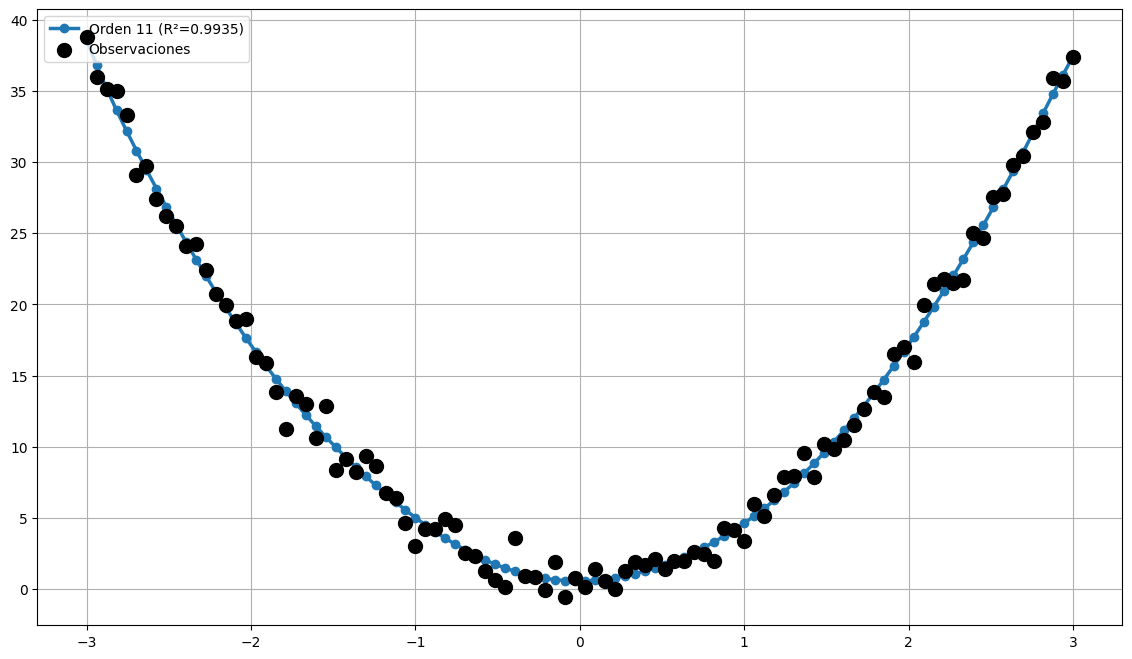

In [100]:
# Crear figura
plt.figure(figsize=(14, 8))

# Graficar las regresiones
plt.plot(x, y_orden_11, 'o-', label=f'Orden 11 (R²={R2_orden11:.4f})', linewidth=2.5)

# Graficar las observaciones
# zorder=10 es para que queden encima
plt.scatter(x, y, color='black', label='Observaciones', s=100, zorder=10)

# Configuración de la gráfica
plt.legend(loc='upper left')
plt.grid()
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

In [101]:
R2_table = pd.DataFrame(index = ['Orden', 'R2'],
                        data = [['1','2', '3', '5', '7', '9', '11'], [R2, R2_orden2 , R2_orden3, R2_orden5, R2_orden7, R2_orden9, R2_orden11]])
R2_table.T

,Orden,R2
0,1,0.000058
1,2,0.993412
2,3,0.993413
3,5,0.993495
4,7,0.993509
5,9,0.993514
6,11,0.993534


**R =** Considero que el mejor modelo es el de orden 3 porque tiene un R2 bastante alto sin ser un modelo tan complejo como los del orden 5,7,9 y 11; es decir, le de orden 3 es un modelo simple y con un R2 considerablemente alto.  

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

**NOTA**

En este caso estamos extrapolando los datos porque el rango es de [-3  3], por lo tanto, si quisieramos saber el valor de "y" cuando x = 5, significa que queremos saber cuanto vale "y" cuando se encuentra en un valor fuera del rango, en este caso cuando x = 5.

In [131]:
new5 = 5
new5_2 = new5**2
new5_3 = new5_2 * new5
new5_4 = new5_3 * new5
new5_5 = new5_4 * new5
new5_6 = new5_5 * new5
new5_7 = new5_6 * new5
new5_8 = new5_7 * new5
new5_9 = new5_8 * new5
new5_10 = new5_9 * new5
new5_11 = new5_10 * new5

### *ORDEN 2*

In [146]:
matriz5_grad2= np.hstack((new5, new5_2))
matriz5_grad2 = matriz5_grad2.reshape(1, 2)
matriz5_grad2

array([[ 5, 25]])

In [117]:
lr_order2 = LinearRegression()
# Usamos la matriz original del orden 2
lr_order2.fit(X, y)

y_pred_new5_order2 = lr_order2.predict(matriz5_grad2)
y_pred_new5_order2

array([[103.96886955]])

### *ORDEN 3*

In [122]:
matriz5_grad3= np.hstack((new5, new5_2, new5_3))
matriz5_grad3 = matriz5_grad3.reshape(1, 3)

In [123]:
lr_3 = LinearRegression()
lr_3.fit(X3, y)

y_pred_new5_order3 = lr_3.predict(matriz5_grad3)
y_pred_new5_order3

array([[104.25232439]])

### *ORDEN 5*

In [133]:
matriz5_grad5= np.hstack((new5, new5_2, new5_3,new5_4, new5_5))
matriz5_grad5 = matriz5_grad5.reshape(1, 5)

In [134]:
lr_5 = LinearRegression()
lr_5.fit(X5, y)

y_pred_new5_order5 = lr_5.predict(matriz5_grad5)
y_pred_new5_order5

array([[84.59895013]])

### *ORDEN 7*

In [135]:
matriz5_grad7= np.hstack((new5, new5_2, new5_3,new5_4, new5_5, new5_6, new5_7))
matriz5_grad7 = matriz5_grad7.reshape(1, 7)

In [136]:
lr_7 = LinearRegression()
lr_7.fit(X7, y)

y_pred_new5_order7= lr_7.predict(matriz5_grad7)
y_pred_new5_order7

array([[33.74321848]])

### *ORDEN 9*

In [138]:
matriz5_grad9= np.hstack((new5, new5_2, new5_3,new5_4, new5_5, new5_6, new5_7, new5_8, new5_9))
matriz5_grad9 = matriz5_grad9.reshape(1, 9)

In [139]:
lr_9 = LinearRegression()
lr_9.fit(X9, y)

y_pred_new5_order9= lr_9.predict(matriz5_grad9)
y_pred_new5_order9

array([[215.73637926]])

### *ORDEN 11*

In [141]:
matriz5_grad11= np.hstack((new5, new5_2, new5_3,new5_4, new5_5, new5_6, new5_7, new5_8, new5_9, new5_10, new5_11))
matriz5_grad11 = matriz5_grad11.reshape(1, 11)

In [142]:
lr_11 = LinearRegression()
lr_11.fit(X11, y)

y_pred_new5_order11= lr_11.predict(matriz5_grad11)
y_pred_new5_order11

array([[-5265.34425354]])

¿Cuál modelo crees que sea mejor?

In [145]:
# usamos el .item() para que solo aparezca el número, sin los corchetes
y5_table = pd.DataFrame(index = ['Orden', 'y cuando x = 5'],
                        data = [['2', '3', '5', '7', '9', '11'],
                         [y_pred_new5_order2.item(), y_pred_new5_order3.item(), y_pred_new5_order5.item(), y_pred_new5_order7.item(), y_pred_new5_order9.item(), y_pred_new5_order11.item()]])
y5_table.T

,Orden,y cuando x = 5
0,2,103.96887
1,3,104.252324
2,5,84.59895
3,7,33.743218
4,9,215.736379
5,11,-5265.344254


**R =** A partir de los resultados obtenidos se puede concluir que los mejores modelos son los de orden 2 y 3, ya que predicen valores muy estables y no reacciona de una forma drámatica cuando se encuentra con valores fuera del rango; mientras que los modelos de orden 5 y 7 muestran mayor sensibilidad e inestabilidad. Ahora bien, es importante mencionar que saber si un modelo extrapola correctamente te permite saber cuándo sus predicciones son confiables y saber que modelo usar cuando se quiere hacer estimaciones fuera del rango; en este caso, los modelos más simples fueron los más estables y los modelos complejos evidenciaron sobreajuste y alta sensibilidad.

Finalmente, si estos resultados se comparan con el mejor modelo según su R2, se puede confirmar que el mejor modelo es el de orden 3, con un R2 bastante alto, estabilidad y capacidad para extrapolar.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3